Perguntas feitas pelo CEO e que devem ser respondidas para poder realizar a compra dos imóveis

# 1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço ?

Planejamento de solução para pergunta 1:
- Coletar os dados do site do Kaggle.
- Agrupar os imóveis por região ( zipcode ).
- Dentro de cada região, eu vou encontrar a mediana do preço do imóvel.
- Vou sugerir os imóveis que estão abaixo do preço mediano da região e que estejam e boas condições e vista para água.

# 2. Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço ?

- Revisar os dados que já estão tratados e organizados
- Agrupar os imóveis comprados por região e zona de sazonalidade
- Realizar a mediana( dos preços) dos imóveis dentro de cada região e sazonalidade
- Condições de venda:
- Comprar as casa a baixo da mediana e revende-las pela mediana geral


Resultados Financeiros




1. O lucro comprando todos os imóveis com vista para a água recomendados e vendendo pela mediana dos valores de todos os imóveis com vista para a água é 20350508.0



2. O lucro comprando todos os imóveis sem vista para a água recomendados e vendendo pela mediana dos valores de todos os imóveis sem vista para a água é 500582001.0

3. O crescimento ano a ano dos imóveis é em média 0,70%, um crescimento muito pequeno, dessa forma é mais viável procurar imóveis abaixo do valor mediana de mercado visando a revenda, potencializando assim os lucros.Os imóveis com vista para a água são, em média, mais caros 212% que os sem vista, portanto é um mercado que precisa de uma aporte financeiro maior, mas com capacidade de gerar um lucro significativo. Com isso, apontamos algumas possibilidades dentro dessa gama de imóveis existem um total de 32 imóveis com valor abaixo da mediana, em boas condições e com uma boa qualidade de vista para água, sendo os imóveis mais indicados a serem comprados. Se todos forem comprados e revendidos pela mediana dos preços dos imóveis com vista para a água é possível gerar um lucro de US 20.350.508,00.

4. Os imóveis sem vista para a água são uma quantidade muito grande, no total 3.587 imóveis, mas todos estão em boas condições e com o valor abaixo da mediana dos valores de imóveis também sem vista para a água, sendo boas indicações para possíveis vistações para julgar a viabilidade de compra. Imóveis reformados são 43,5% mais caros que imóveis não reformados, pensando nisso selecionamos 3.515 imóveis que não foram reformados, mas estão em boas condições e abaixo da mediana do mercado, demandando um gasto baixo com a reforma e potencializando o valor de revenda.

5. Imóveis com três banheiros ou mais são em média 105% mais caros do que os imóveis com menos de 3 banheiros. Então foram selecionados 2.150 imóveis que possuem menos que três banheiros e em boas condições, o ideal seria avaliar esses imóveis para determinar a possibilidade de criar um terceiro banheiro, aumentando significamente seu valor de mercado após a reforma e consequentemente o lucro. Seguindo a mesma lógica foram avaliados imóveis referente aos quartos e se constatou que os imóveis com três quartos ou mais são em média 42,5% mais caros do que os imóveis com menos de 3 quartos, totalizaram um total de 460 imóveis que também precisariam ser avaliados sobre a possibilidade de criar um terceiro quarto.

6. Em suma, foi estudada qual a melhor época do ano para se comprar ou vender os imóveis. E no inverno os valores estão mais baixos, portanto é uma boa época para adquirir os imóveis e para vender os imóveis é na primavera seguida pelo verão, tendo um diferença 5% a 6,5% de lucro comprando e vendendo nas estações indicadas.

##### Confira o desenvolvimento abaixo:

In [66]:
## Importando Bibliotecas 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import openpyxl


## Carregando dados

In [67]:
# loading data into memor
df= pd.read_csv( 'datasets/kc_house_data.csv' )
#Convertendo tipo data para datetime
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d') 

In [68]:
#Visualizando o inicio do dataframe 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [69]:
#tamanho
df.shape

(21613, 21)

## Realizando a Limpeza dos dados

In [70]:
#removendo as colunas que não terão relevância para as questões do problema, primiero irei visualizar
# Visualizando as colunasque existem no dataframe( a remoção das colunas que não serão utilizadas, já foram realizadas)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [72]:
to_remove = ['sqft_living', 
             'sqft_lot', 
             'floors',
             'grade',
             'sqft_above', 
             'sqft_basement',
             'lat', 
             'long',
             'sqft_living15', 
             'sqft_lot15']
df = df.drop(columns=to_remove)

In [73]:
# Visualizando so tipos dos dados no dataframe(para garantir a conversão do elemento(date))
df.dtypes

id                       int64
date            datetime64[ns]
price                  float64
bedrooms                 int64
bathrooms              float64
waterfront               int64
view                     int64
condition                int64
yr_built                 int64
yr_renovated             int64
zipcode                  int64
dtype: object

In [74]:
# Removendo id's duplicados
df = df.drop_duplicates('id')
df.shape

(21436, 11)

## Análise estatística dos elementos

In [75]:
# Selecionando as colunas do tipo int e float
df_statistics = df.select_dtypes( include=['int64', 'float64'])

# Média, mediana, desvio padrão, valores máximos e valores mínimos 
mean = pd.DataFrame(df_statistics.apply(np.mean))
median = pd.DataFrame(df_statistics.apply(np.median))
std = pd.DataFrame(df_statistics.apply(np.std))
min_ = pd.DataFrame(df_statistics.apply(np.min))
max_ = pd.DataFrame(df_statistics.apply(np.max))

# Criando uma tabela com as análises estatisticas
statistics = pd.concat([mean, median, std, min_, max_], axis=1).reset_index()
statistics.columns = ['attributes', 'mean', 'median', 'std', 'min', 'max']

# Removendo a notação científica
pd.set_option('display.float_format', lambda x: '%.2f' %x)
statistics

,attributes,mean,median,std,min,max
0,id,4580765328.18,3904921185.00,2876522535.73,1000102.00,9900000190.00
1,price,540529.29,450000.00,367680.72,75000.00,7700000.00
2,bedrooms,3.37,3.00,0.93,0.00,33.00
3,bathrooms,2.12,2.25,0.77,0.00,8.00
4,waterfront,0.01,0.00,0.09,0.00,1.00
5,view,0.24,0.00,0.77,0.00,4.00
6,condition,3.41,3.00,0.65,1.00,5.00
7,yr_built,1971.10,1975.00,29.38,1900.00,2015.00
8,yr_renovated,84.73,0.00,402.42,0.00,2015.00
9,zipcode,98077.86,98065.00,53.47,98001.00,98199.00


In [76]:
# Definindo a média de preços por região
price_region = df[['price','zipcode']].groupby(['zipcode']).mean().reset_index()
price_region

,zipcode,price
0,98001,280989.69
1,98002,234083.87
2,98003,294225.39
3,98004,1354599.63
4,98005,810164.88
...,...,...
65,98177,676800.30
66,98178,310622.64
67,98188,289327.07
68,98198,302925.95


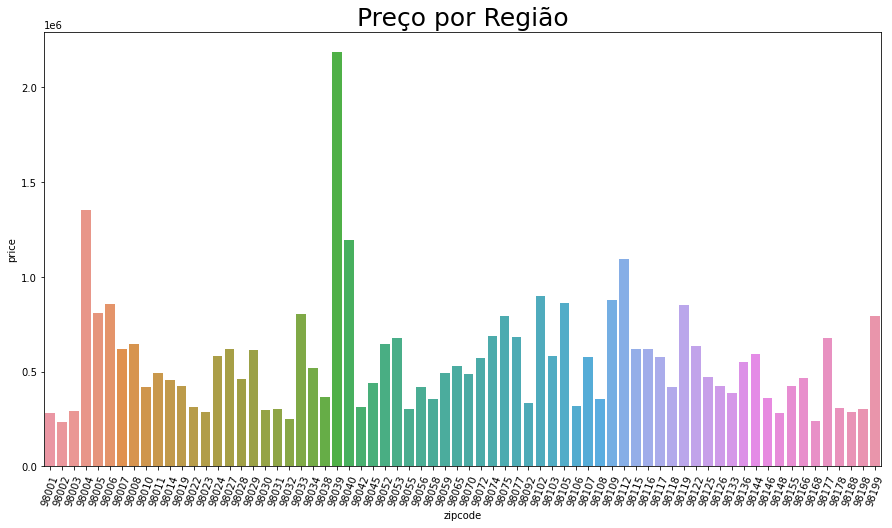

In [77]:
# Gráfico com os valores médios por região
plt.figure(figsize = (15,8))
sns.barplot( x = price_region['zipcode'], y = price_region['price'])
plt.title('Preço por Região', fontsize=25)
plt.xticks(rotation=70);

## Insights importantes mediante a análise:

### Crescimento médio do valor dos imóveis YOY

In [78]:
# Calculando a média por ano
df['year'] = df.date.dt.year
YoY = df[['year', 'price']].groupby('year').mean().reset_index()

# Crescimento Percentual
avg_growth = (((YoY.loc[1, 'price'])-(YoY.loc[0, 'price']))/(YoY.loc[1, 'price']))*100
print(f' O crescimento médio do valor dos imóves ano após ano é de{avg_growth: .2f}%')

 O crescimento médio do valor dos imóves ano após ano é de 0.70%


### Imóveis com vista para o mar são mais caros


 Os imóveis com vista para a água são 212.42% mais caros, em média, do que os não possuem vista para a água


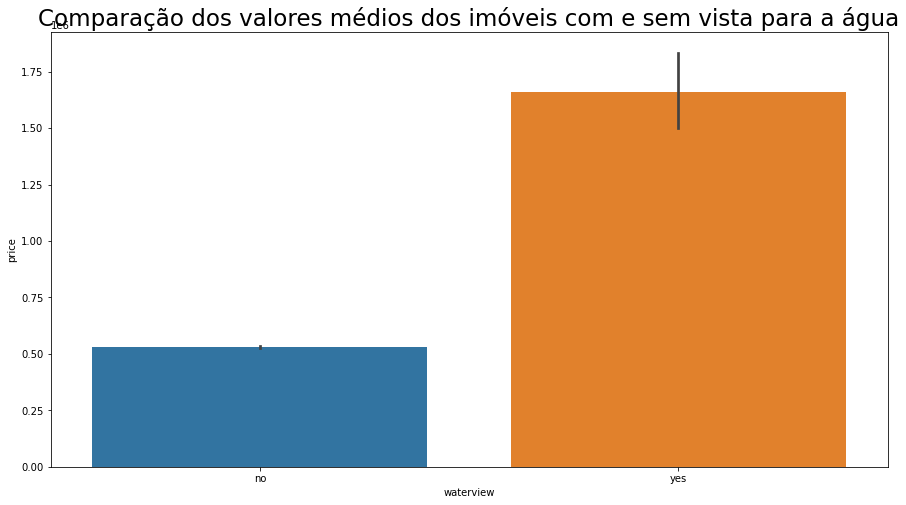

In [79]:
# Média dos valores dos imóveis com e sem vista para aágua
waterview = df.loc[df.waterfront == 1, 'price'].mean()
no_waterview = df.loc[df.waterfront == 0, 'price'].mean()

# Percentual de quanto mais caros são os imóveis com vista para a água
avg_waterview = (waterview - no_waterview)/no_waterview*100
print(f' Os imóveis com vista para a água são{avg_waterview: .2f}% mais caros, em média, do que os não possuem vista para a água')

# Gráfico demonstrando a diferença entre os valores dos imóveis com e sem vsita
df.loc[df['waterfront']!=0, 'waterview'] = 'yes'
df.loc[df['waterfront']==0, 'waterview'] = 'no'
plt.figure(figsize = (15,8))
sns.barplot( x = df['waterview'], y = df['price']);
plt.title('Comparação dos valores médios dos imóveis com e sem vista para a água', fontsize=23);

## Imóveis com vista para o mar abaixo da mediana e com boa condição.

In [80]:
# Calculando a mediana
waterview_median = df.loc[df['waterfront'] == 1, 'price'].median()

# Definindo imóveis com vista para a água
waterview = pd.DataFrame(df.loc[df['waterfront'] == 1])

# Definindo o lucro
waterview['median_price'] = df.loc[df['waterfront'] == 1, 'price'].median()
waterview['profit'] = waterview[['price','median_price']].apply(lambda x: x['median_price'] - x['price'], axis=1)

# Removendo imóveis com condição ruim
waterview_remove1 = waterview.loc[waterview['condition'] < 4]
waterview = waterview.drop(waterview_remove1.index)

# Removendo imóveis acima da mediana dos preços
waterview_remove2 = waterview.loc[waterview['price']>= waterview_median]
waterview = waterview.drop(waterview_remove2.index)

# Removendo imóveis com uma visão ruim para a água
waterview_remove3 = waterview.loc[waterview['view']<= 2]
waterview_buy = waterview.drop(waterview_remove3.index)

# Exportando planilha com os imóveis recomendados
waterview_buy.to_excel('imoveis_vista_agua.xlsx',sheet_name='vista_agua' ,index=False)

# Imóveis com vista para a água com valores abaixo da mediana e com boa condição
waterview_buy

,id,date,price,bedrooms,bathrooms,waterfront,view,condition,yr_built,yr_renovated,zipcode,year,waterview,median_price,profit
264,2123039032,2014-10-27,369900.00,1,0.75,1,4,5,1936,0,98070,2014,yes,1400000.00,1030100.00
457,2122039094,2014-11-26,705000.00,3,3.00,1,3,4,1980,0,98070,2014,yes,1400000.00,695000.00
1081,7567600045,2014-08-27,825000.00,2,1.00,1,4,4,1908,0,98178,2014,yes,1400000.00,575000.00
1168,3523029041,2014-10-09,290000.00,2,0.75,1,3,4,1943,0,98070,2014,yes,1400000.00,1110000.00
1949,1922039062,2015-04-20,480000.00,2,1.50,1,4,4,1943,2002,98070,2015,yes,1400000.00,920000.00
2075,3623500260,2014-05-12,1200000.00,3,1.75,1,4,4,1928,0,98040,2014,yes,1400000.00,200000.00
2964,2322029048,2014-11-19,999000.00,3,2.75,1,3,4,1962,0,98070,2014,yes,1400000.00,401000.00
3252,3343301910,2014-10-20,1000000.00,5,4.50,1,4,5,1939,1963,98006,2014,yes,1400000.00,400000.00
3829,8550001515,2014-10-01,429592.00,2,2.75,1,4,5,1903,0,98070,2014,yes,1400000.00,970408.00
4295,7781600025,2014-10-23,1155000.00,3,2.50,1,4,4,1961,0,98146,2014,yes,1400000.00,245000.00


### Imóveis sem vista para o mar abaixo da mediana e em boas condições

In [82]:
# Calculando a mediana
nowaterview_median = df.loc[df['waterfront'] == 0, 'price'].median()

# Definindo imóveis sem vista para a água
nowaterview = pd.DataFrame(df.loc[df['waterfront'] == 0])

# Definindo o lucro
nowaterview['median_price'] = df.loc[df['waterfront'] == 0, 'price'].median()
nowaterview['profit'] = nowaterview[['price','median_price']].apply(lambda x: x['median_price'] - x['price'], axis=1)

# Removendo imóveis com condição ruim
nowaterview_remove1 = nowaterview.loc[nowaterview['condition'] < 4]
nowaterview = nowaterview.drop(nowaterview_remove1.index)

# Removendo imóveis acima da mediana dos preços
nowaterview_remove2 = nowaterview.loc[nowaterview['price']>= nowaterview_median]
nowaterview_buy = nowaterview.drop(nowaterview_remove2.index)

# Exportando planilha com os imóveis recomendados
nowaterview_buy.to_excel('imoveis_sem_vista_agua.xlsx',sheet_name='sem_vista_agua' ,index=False)

# Imóveis sem vista para a água com valores abaixo da mediana e com boa condição
nowaterview_buy

,id,date,price,bedrooms,bathrooms,waterfront,view,condition,yr_built,yr_renovated,zipcode,year,waterview,median_price,profit
12,114101516,2014-05-28,310000.00,3,1.00,0,0,4,1927,0,98028,2014,no,450000.00,140000.00
13,6054650070,2014-10-07,400000.00,3,1.75,0,0,4,1977,0,98074,2014,no,450000.00,50000.00
18,16000397,2014-12-05,189000.00,2,1.00,0,0,4,1921,0,98002,2014,no,450000.00,261000.00
19,7983200060,2015-04-24,230000.00,3,1.00,0,0,4,1969,0,98003,2015,no,450000.00,220000.00
20,6300500875,2014-05-14,385000.00,4,1.75,0,0,4,1947,0,98133,2014,no,450000.00,65000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678,1332700030,2015-03-12,293000.00,2,2.25,0,0,4,1979,0,98056,2015,no,450000.00,157000.00
20697,3449000200,2015-05-08,360000.00,4,1.75,0,0,4,1960,0,98059,2015,no,450000.00,90000.00
21079,3449000010,2015-03-12,294570.00,3,1.00,0,0,4,1960,0,98059,2015,no,450000.00,155430.00
21332,9266700190,2015-05-11,245000.00,1,1.00,0,0,4,1920,0,98103,2015,no,450000.00,205000.00


## Imóveis antigos e reformados são mais caros que imóveis novos

 Os imóveis renovados são 43.52% mais caros, em média, do que os não reformados


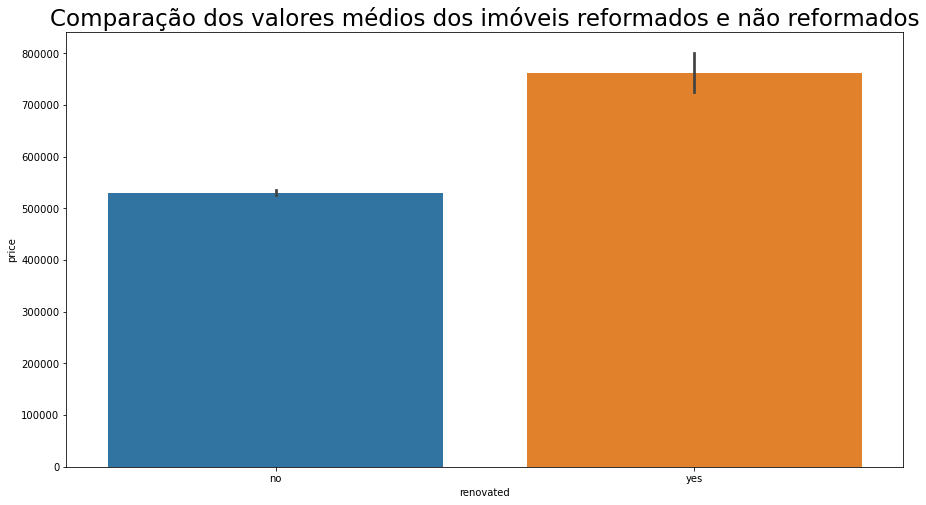

In [83]:
# Média dos valores dos imóveis renovados e não renovados
renovated = df.loc[df.yr_renovated != 0, 'price' ].mean()
no_renovated = df.loc[df['yr_renovated'] == 0, 'price' ].mean()

# Percentual de quanto mais caros são os imóveis reformados em relação aos não reformados
avg_renovated = (renovated - no_renovated)/no_renovated*100
print(f' Os imóveis reformados são{avg_renovated: .2f}% mais caros, em média, do que os não reformados')

# Gráfico demonstrando a diferença entre os valores dos imóveis reformados e não reformados
df.loc[df['yr_renovated']!=0, 'renovated'] = 'yes'
df.loc[df['yr_renovated']==0, 'renovated'] = 'no'
plt.figure(figsize = (15,8))
sns.barplot( x = df['renovated'], y = df['price'])
plt.title('Comparação dos valores médios dos imóveis reformados e não reformados', fontsize=23);

##  Imóveis nunca reformados

 Os imóveis reformados são 44.05% mais caros, em média, do que os antigos
 Os imóveis reformados são 23.66% mais caros, em média, do que os novos


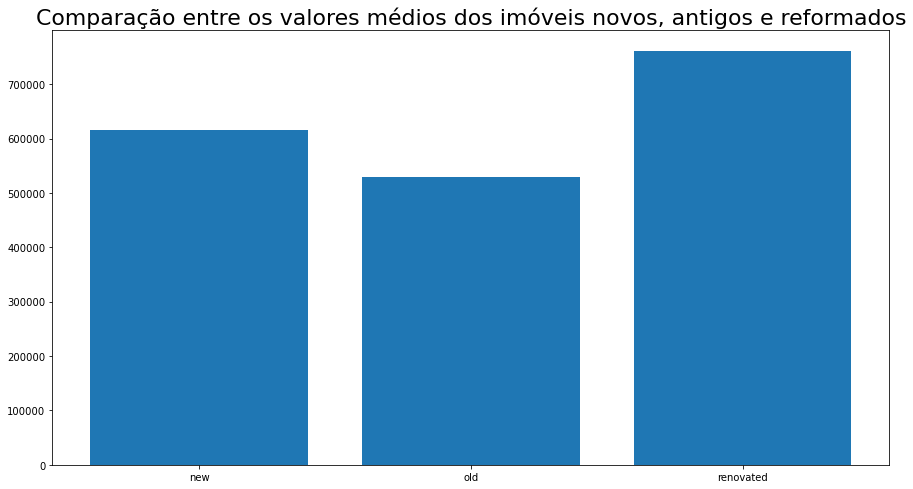

In [84]:
# Média dos valores dos imóveis novos, antigos e renovados.
new = df.loc[df.yr_built >= 2005, 'price' ].mean()
old = df.loc[df.yr_built <= 2005, 'price' ].mean()
renovated = df.loc[df.yr_renovated != 0, 'price' ].mean()

# Percentual de quanto mais caros são os imóveis reformados em relação aos antigos.
avg_old = (renovated - old)/old*100
print(f' Os imóveis reformados são{avg_old: .2f}% mais caros, em média, do que os antigos')

# Percentual de quanto mais caros são os imóveis reformados em relação aos novos
avg_new = (renovated - new)/new*100
print(f' Os imóveis reformados são{avg_new: .2f}% mais caros, em média, do que os novos')

# Gráfico demonstrando a diferença entre os valores dos imóveis novos, antigos e reformados
imoveis = ['new', 'old', 'renovated']
valores = [ new , old , renovated]
plt.figure(figsize = (15,8))
plt.bar(imoveis, valores)
plt.title('Comparação entre os valores médios dos imóveis novos, antigos e reformados', fontsize=22)
plt.show()

### Imóveis com 3 banheiros ou mais são mais caros do que imóveis com menos que 3 banheiros

 Os imóveis com 3 banheiros ou mais são 105.64% mais caros, em média, do que os imóveis com dois banheiros ou menos


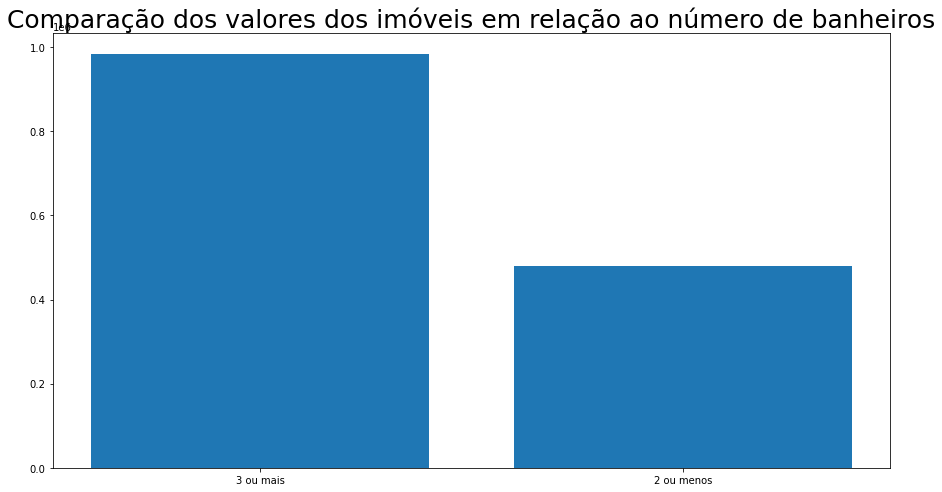

In [85]:
# Média dos valores dos imóveis com 3 ou mais banheiros e 2 ou menos banheiros
bath_3 = df.loc[df['bathrooms']>= 3, 'price'].mean()
bath_2 = df.loc[df['bathrooms']< 3, 'price'].mean()

# Percentual de quanto mais caros são os imóveis com 3 ou mais banheiros em relação a imóveis com 2 ou menos banheiros
avg_bath = (bath_3 - bath_2)/bath_2*100
print(f' Os imóveis com 3 banheiros ou mais são{avg_bath: .2f}% mais caros, em média, do que os imóveis com dois banheiros ou menos')

# Gráfico demonstrando a diferença entre os valores dos imóveis.
banheiros = ['3 ou mais', '2 ou menos']
valores = [ bath_3 , bath_2]
plt.figure(figsize = (15,8))
plt.bar(banheiros, valores)
plt.title('Comparação dos valores dos imóveis em relação ao número de banheiros', fontsize=25)
plt.show()

## Imóveis com 3 quartos ou mais são mais caros do que imóveis com menos que 3 quartos.

 Os imóveis com 3 quartos são 42.52% mais caros, em média, do que os imóveis com dois quartos


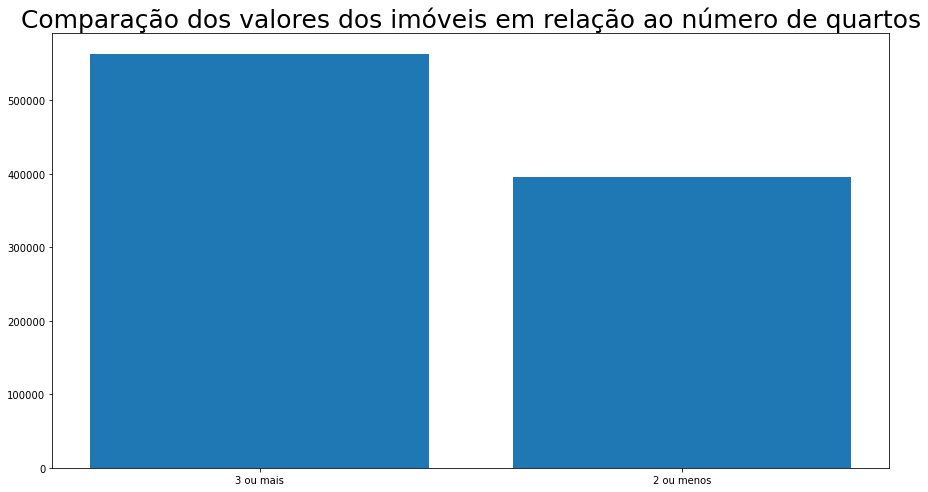

In [86]:
# Média dos valores dos imóveis com 3 ou mais quartos e 2 ou menos quartos
bed_3 = df.loc[df['bedrooms']>= 3, 'price'].mean()
bed_2 = df.loc[df['bedrooms']< 3, 'price'].mean()

# Percentual de quanto mais caros são os imóveis com 3 ou mais quartos em relação a imóveis com 2 ou menos quartos
avg_bed = (bed_3 - bed_2)/bed_2*100
print(f' Os imóveis com 3 quartos são{avg_bed: .2f}% mais caros, em média, do que os imóveis com dois quartos')

# Gráfico demonstrando a diferença entre os valores dos imóveis.
bedrooms = ['3 ou mais', '2 ou menos']
values = [ bed_3 , bed_2]
plt.figure(figsize = (15,8))
plt.bar(bedrooms, values)
plt.title('Comparação dos valores dos imóveis em relação ao número de quartos', fontsize=25)
plt.show()

## Estações do ano que são melhores para realizar a compra e a venda dos imóveis

 Os imóveis no verão são 2.89% mais caros, em média, que no outono
 Os imóveis no verão são 5.19% mais caros, em média, que no inverno
 Os imóveis na primavera são 4.20% mais caros, em média, que no outono
 Os imóveis na primavera são 6.54% mais caros, em média, que no inverno
 Os imóveis na primavera são 1.28% mais caros, em média, que no verão
 Os imóveis no outono são 2.24% mais caros, em média, que no inverno


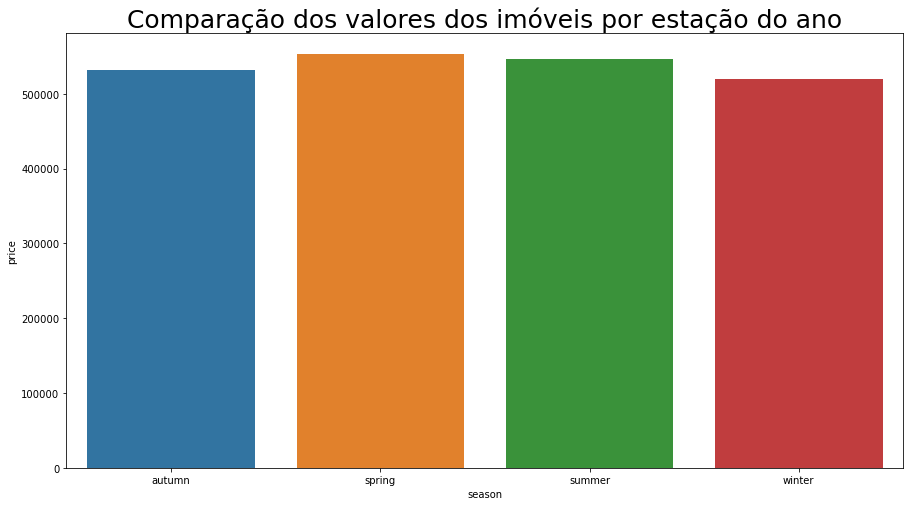

In [88]:
# Definindo as estações do ano
df['season'] = df['date'].dt.month.apply(lambda x: 'summer' if x in [6,7,8]
                                              else 'autumn' if x in [9,10,11]
                                              else 'winter' if x in [12,1,2]
                                              else 'spring')

# Média dos valores dos imóveis por estação
summer = df.loc[df['season']== 'summer', 'price'].mean()
autumn = df.loc[df['season']== 'autumn', 'price'].mean()
winter = df.loc[df['season']== 'winter', 'price'].mean()
spring = df.loc[df['season']== 'spring', 'price'].mean()

# Percentual de quanto mais caros são os imóveis no verão em relação ao outono
avg_sa = (summer - autumn)/autumn*100
print(f' Os imóveis no verão são{avg_sa: .2f}% mais caros, em média, que no outono')
# Percentual de quanto mais caros são os imóveis no verão em relação ao inverno
avg_sw = (summer - winter)/winter*100
print(f' Os imóveis no verão são{avg_sw: .2f}% mais caros, em média, que no inverno')
# Percentual de quanto mais caros são os imóveis no primavera em relação ao outono
avg_spa = (spring - autumn)/autumn*100
print(f' Os imóveis na primavera são{avg_spa: .2f}% mais caros, em média, que no outono')
# Percentual de quanto mais caros são os imóveis no primavera em relação ao inverno
avg_spw = (spring - winter)/winter*100
print(f' Os imóveis na primavera são{avg_spw: .2f}% mais caros, em média, que no inverno')
# Percentual de quanto mais caros são os imóveis no primavera em relação ao verão
avg_spa = (spring - summer)/summer*100
print(f' Os imóveis na primavera são{avg_spa: .2f}% mais caros, em média, que no verão')
# Percentual de quanto mais caros são os imóveis no outono em relação ao inverno
avg_spa = (autumn - winter)/winter*100
print(f' Os imóveis no outono são{avg_spa: .2f}% mais caros, em média, que no inverno')


# Definindo o preço médio dos imóveis por região e estação
price_region_season = df[['price','zipcode','season']].groupby(['zipcode','season']).mean().reset_index()

# Definindo o preço dos imóveis por estação
price_season = df[['price','season']].groupby(['season']).mean().reset_index()
# Gráfico com o preço médio dos imóveis por estação
plt.figure(figsize = (15,8))
sns.barplot( x = price_season['season'], y = price_season['price'])
plt.title('Comparação dos valores dos imóveis por estação do ano', fontsize=25);